In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from collections import Counter
import seaborn as sns

In [2]:
beh_data_dir = "data/COBAR_behaviour_incl_manual.pkl"
#beh_data_dir = "data/COBAR_behaviour.pkl"
beh_df = pd.read_pickle(beh_data_dir)
beh_df

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    25195  251.800000 -9223372036854775808   
                          25196  251.809967 -9223372036854775808   
                          25197  251.819967 -9223372036854775808   
                          25198  251.829967 -9223372036854775808   
                          25199  251.839967 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [3]:
neural_data_dir = beh_data_dir = "data/COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)
neural_df

t     neuron_0    neuron_1  \
Date   Genotype Fly Trial Frame                                        
210301 J1xCI9   1   0     0        1.846767   886.468822  539.078854   
                          1        1.908333   904.990346  549.142576   
                          2        1.969900   951.343444  495.389359   
                          3        2.031467   919.118001  488.734655   
                          4        2.093000   811.207176  598.854688   
...                                     ...          ...         ...   
                    11    4035   250.257500  1091.733025  229.036370   
                          4036   250.319067  1083.689512  224.277678   
                          4037   250.380600  1016.800708  263.032693   
                          4038   250.442167  1100.966747  217.181669   
                          4039   250.503733  1127.533714  211.338355   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       648.448219   659.934798   960.886917   
                          1       641.978012   673.451323   959.120909   
                          2       667.900427   647.023920   922.999666   
                          3       627.207506   669.359604   967.324279   
                          4       598.844883   614.788711   927.682820   
...                                      ...          ...          ...   
                    11    4035   1673.098351  2788.830860  1832.827041   
                          4036   1626.795243  2803.103042  1869.423843   
                          4037   1624.789506  2755.284855  1924.012693   
                          4038   1569.018839  2890.244587  1921.096732   
                          4039   1718.190280  2731.183736  2022.781228   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1087.578005  1264.055465   689.275322   
                          1      1033.622170  1293.954485   647.848768   
                          2      1035.334534  1298.692514   668.630966   
                          3      1081.832837  1320.492280   697.383989   
                          4      1015.316407  1274.834253   679.311958   
...                                      ...          ...          ...   
                    11    4035   1548.782680  1388.706244  2238.306798   
                          4036   1675.233107  1604.436872  2281.367960   
                          4037   1810.982975  1496.055076  2359.644688   
                          4038   1735.650159  1389.671633  2330.835800   
                          4039   1826.932777  1474.406872  2223.860182   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1297.684359  ...  1434.945788  1039.457277   
                          1      1253.930092  ...  1432.954386  1032.438934   
                          2      1285.729967  ...  1358.161531   974.769252   
                          3      1255.667939  ...  1386.650784  1004.453438   
                          4      1241.864999  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   2029.408911  ...   887.114691  1734.396430   
                          4036   2128.465504  ...  1002.946415  1733.634185   
                          4037   2044.958695  ...  1064.565073  1804.522860   
                          4038   2068.464632  ...  1058.037690  1807.967783   
                          4039   1991.379295  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                         
21030

In [4]:
#Δ𝐹/𝐹 = (F − Fb)/𝐹b , where Fb is the baseline fluorescence.
# return baselined neural data
def neural_dF_F(data):
    rlt_Df_f=data.copy()
    nb_neurons = np.size(data,1)
    
    for j in np.arange(nb_neurons-1): 
        baseline = data['neuron_' + str(j)].rolling(window=3).mean()
        rlt_Df_f['neuron_' + str(j)] = (data['neuron_' + str(j)]-abs(baseline.min()))/abs(baseline.min())
    return rlt_Df_f

In [5]:
def butter_lowpass_filter(data, cutoff, fs, order):
    """
    Apply a butterworth (lowpass) filter on the data for denoising according to the parameters given.
    Parameters
    ----------
    data : DataFrame
         The data to which you want to apply the noise filter.
    cutoff : float
        Cutoff frequency for your butterworth filter.
    fs : float
        Sampling frequency.
    order : integer
        Order of the filter.
    Returns
    -------
    reduced : numpy matrix
        Numpy matrix with denoised data according to the parameters given.
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y

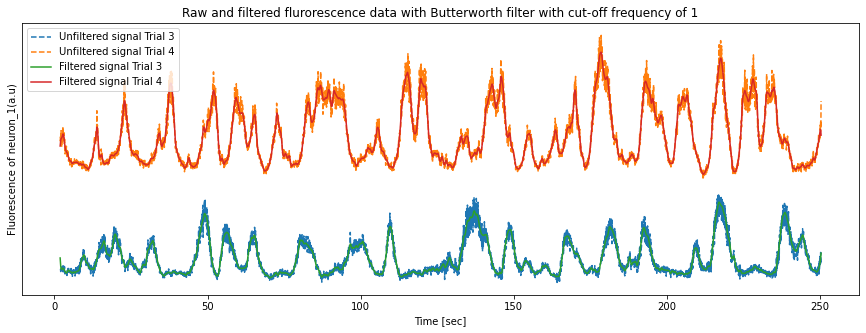

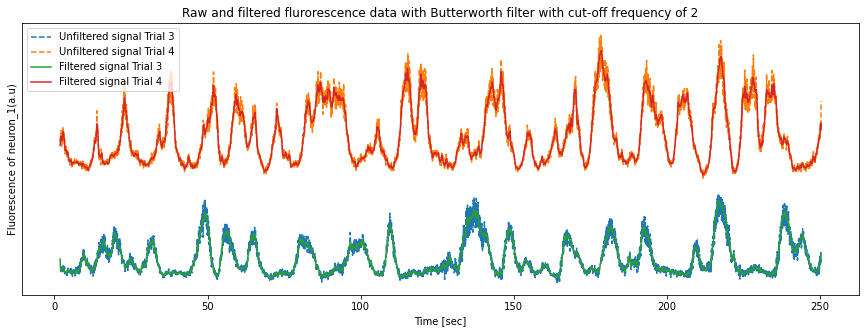

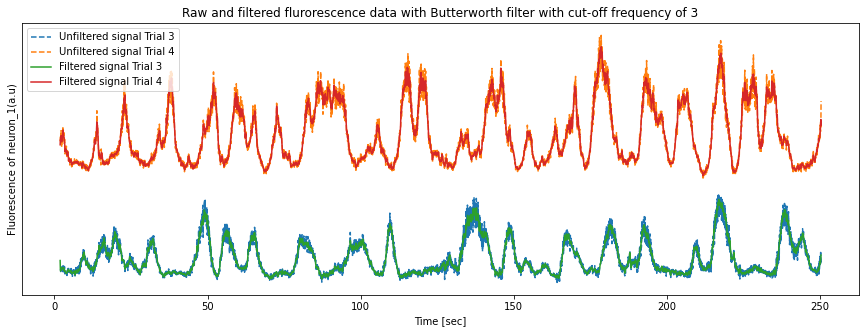

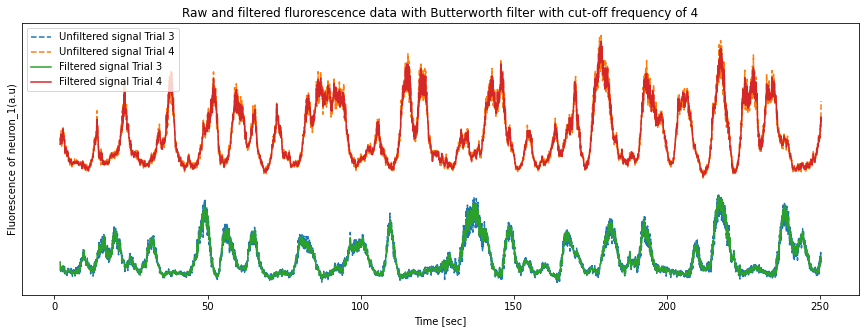

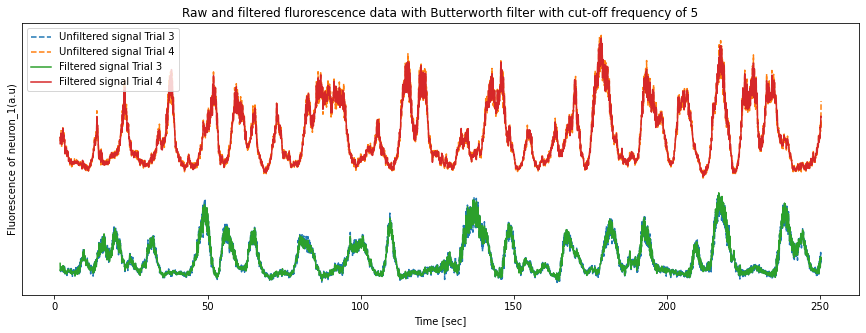

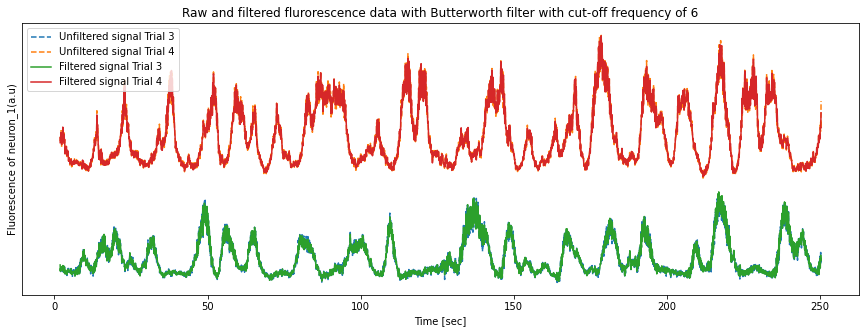

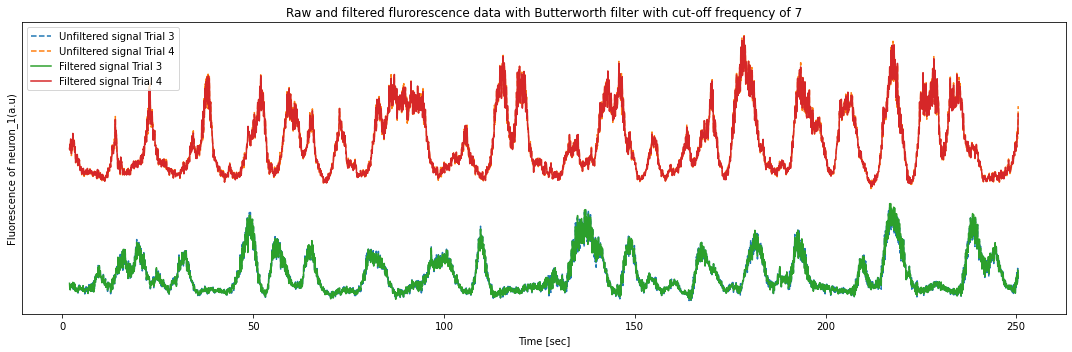

In [70]:
#plots to justify parameters choice for the filter for the neural data
filtered_neural_df = neural_df.copy(deep=True)
neural_signals_neuron_1 = neural_df["neuron_1"]
time = neural_df["t"]

#these parameters are fixed
fs=16.0
order=2

#optional interactive plot to enable the zooming in
#%matplotlib notebook
#import mpld3
#mpld3.enable_notebook()

#define range of cut-off frequencies to explore for the neural data
rangefcut=range(1,8,1)
ytick = []

time = neural_df["t"]
for cutoff in rangefcut:
    fig, ax = plt.subplots(figsize = (15,5))
    for i in range(3,5,1):
        # look at two trials at the same time for more robust results
        t=time[time.index.get_level_values("Trial")==i]
        neural_signals_neuron_1_trial_i = neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]+i*1500
        plt.plot(t, neural_signals_neuron_1_trial_i, alpha = 1, linestyle='dashed', label=f'Unfiltered signal Trial {i}')
        ytick.append(neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
        plt.xlabel('Time [sec]')

    #superimpose filtered data
    filtered_neural_df_neuron_1 = butter_lowpass_filter(neural_df['neuron_1'], cutoff, fs, order) #this line has to be used with the following one
    filtered_neural_df.neuron_1=filtered_neural_df_neuron_1
    filtered_neural_signals_neuron_1 = filtered_neural_df['neuron_1']
    time=filtered_neural_df["t"]
    for i in range(3,5,1):
        filtered_neural_signals_neuron_1_trial_i = filtered_neural_signals_neuron_1[filtered_neural_df.index.get_level_values("Trial")==i]+i*1500
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, filtered_neural_signals_neuron_1_trial_i, alpha = 1, label=f'Filtered signal Trial {i}')
        ytick.append(filtered_neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
        plt.xlabel('Time [sec]')
        plt.title(f"Raw and filtered flurorescence data with Butterworth filter with cut-off frequency of {cutoff}")
        plt.legend(loc='upper left')
        plt.ylabel('Fluorescence of neuron_1(a.u)')
        
        plt.yticks([])
plt.tight_layout()
plt.show()
fig.savefig('report_images/rangebuttfilt_neuron_1.png')

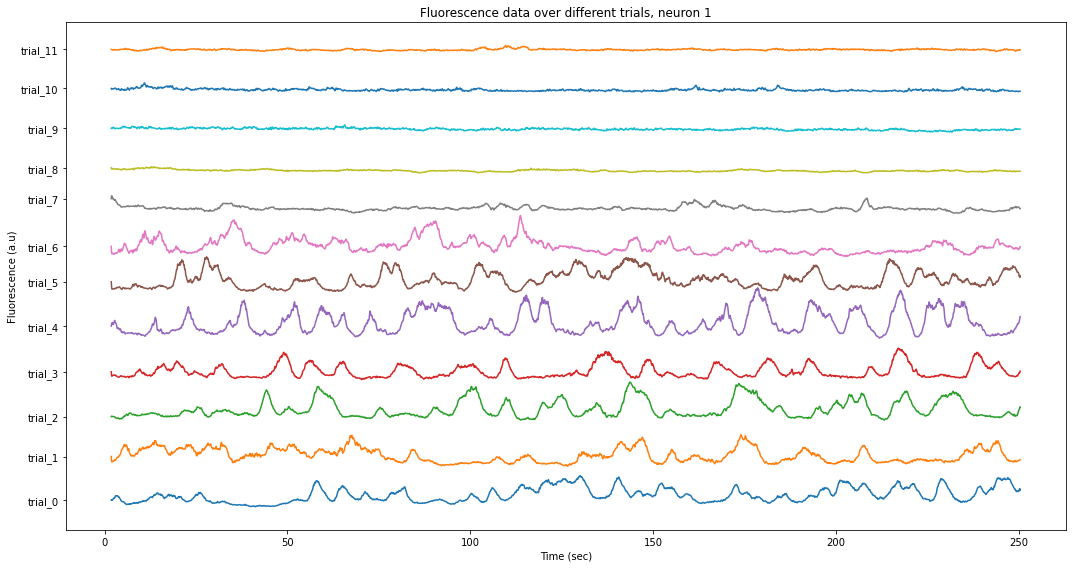

In [7]:
#plot filtered neural data for neuron_1 for all the trials for visual comparison with the raw plotting
filtered_neural_df = neural_df.copy(deep=True) 
fs=16.0
order=2
cutoff=2.5 #chosen value based on previous results

#apply filter for plotting
filtered_neural_df_neuron_1 = butter_lowpass_filter(neural_df['neuron_1'], cutoff, fs, order)
filtered_neural_df.neuron_1=filtered_neural_df_neuron_1
filtered_neural_signals_neuron_1 = filtered_neural_df['neuron_1']

# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
fig, ax1 = plt.subplots(figsize = (15,8))

ytick = []
for i in np.arange(12):   
    filtered_neural_signals_neuron_1_trial_i = filtered_neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]
    #ax1.plot(neural_df["t"].iloc[:380], i*1500 + neural_signals_neuron_1_trial_i.iloc[:380], label = 'trial_' + str(i))
    ax1.plot(filtered_neural_df["t"].iloc[:4039], i*1500 + filtered_neural_signals_neuron_1_trial_i.iloc[:4039], label = 'trial_' + str(i))
    ytick.append(filtered_neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data over different trials, neuron 1')

ax1.set_yticks(np.array(ytick))
neuron_names = ['trial_' + str(i) for i in range(12)]
ax1.set_yticklabels(neuron_names)


plt.tight_layout()
plt.show()
fig.savefig('report_images/filtered_fluo_neurone1.png')

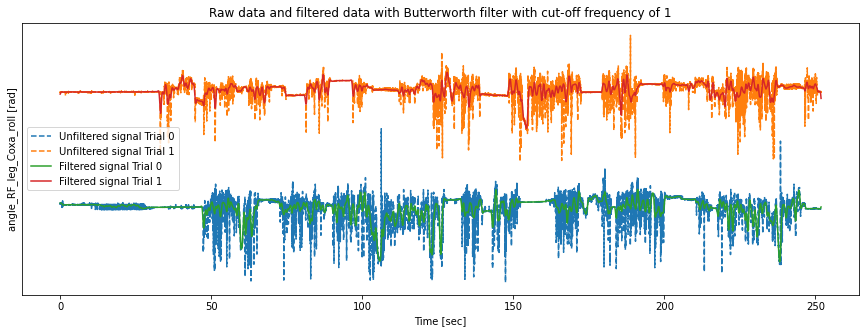

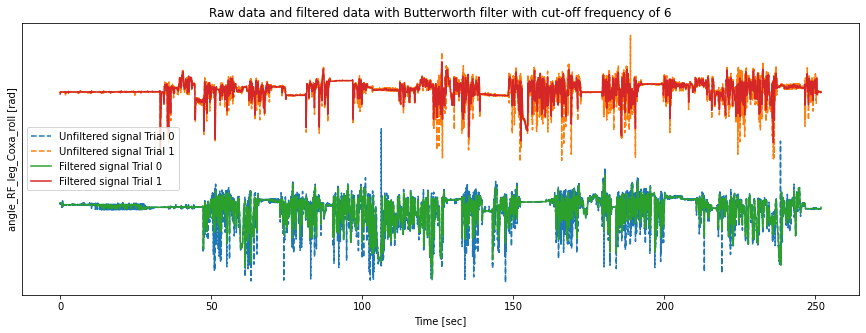

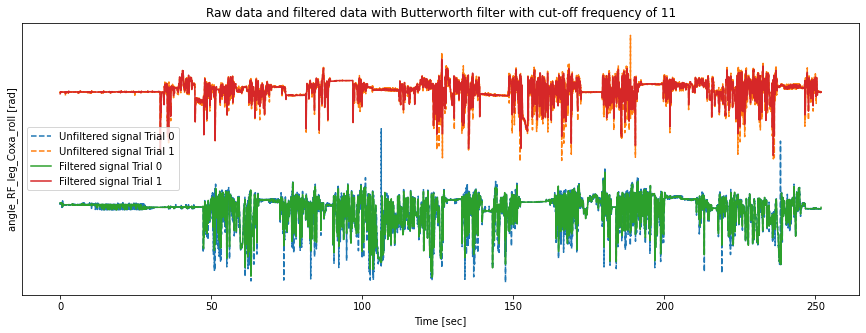

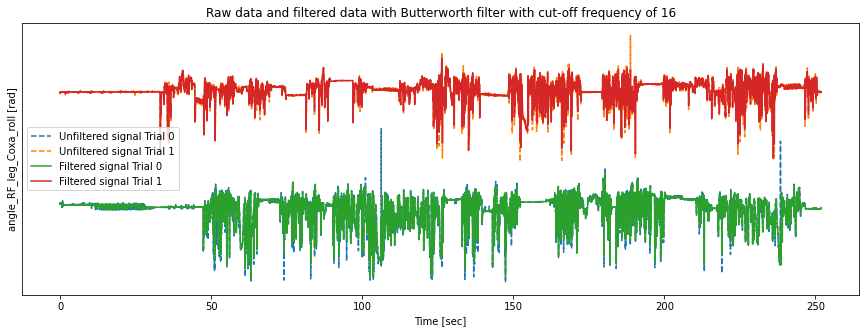

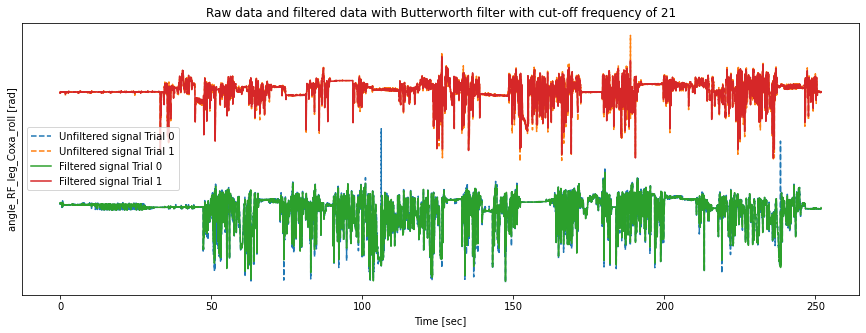

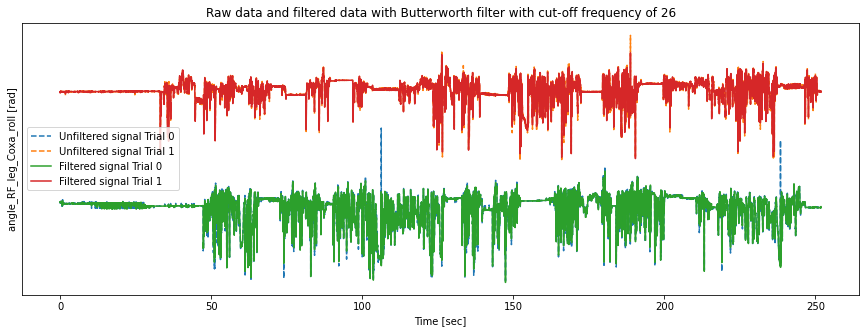

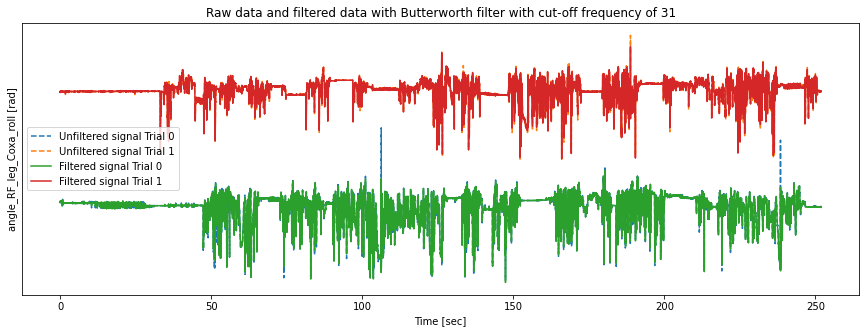

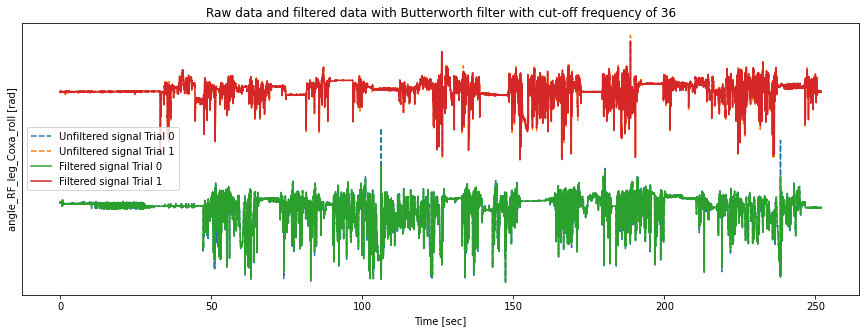

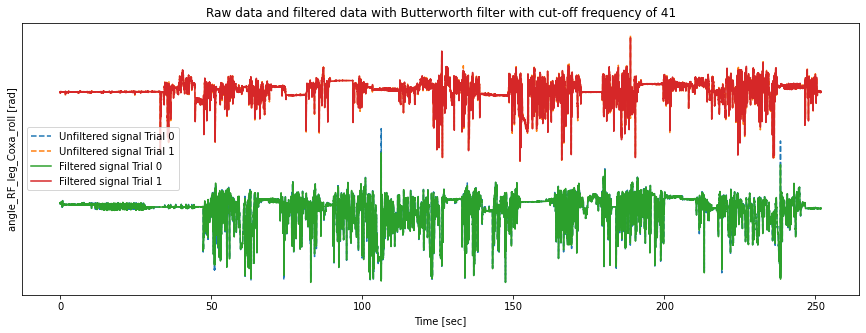

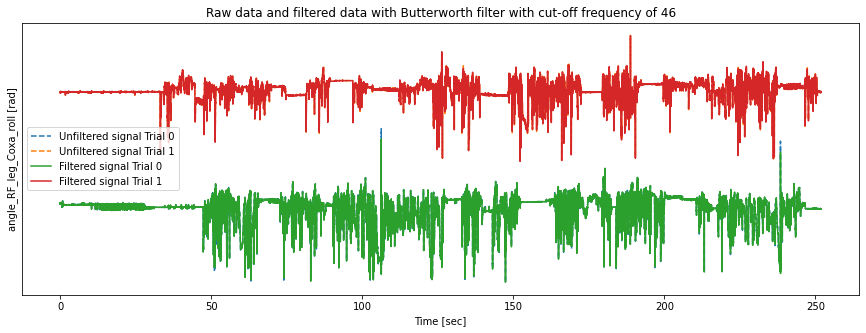

In [9]:
# plots to justify parameters choice for the filter for the behavioral data
filtered_beh_df = beh_df.copy(deep=True)

#these parameters are fixed
fs=100.0
order=2
#plot unifltered of one specific angle
angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"]
time = beh_df["t"]

#interactive plot to enable the zooming in
#%matplotlib notebook
#import mpld3
#mpld3.enable_notebook()

#define range of cut-off frequencies to explore for the behavioral data
rangefcut=range(1,49,5)
for cutoff in rangefcut:
    fig, ax = plt.subplots(figsize = (15,5))
    for i in range(2):
        
        # look at two trials at the same time for more robust resultsfl
        y = angle_RF_leg_roll[angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, y, alpha = 1, linestyle='dashed', label=f'Unfiltered signal Trial {i}')
        plt.xlabel('Time [sec]')
        plt.legend()
        
    #superimpose filtered data
    filtered_beh_df_anglerf = butter_lowpass_filter(beh_df["angle_RF_leg_Coxa_roll"], cutoff, fs, order)
    filtered_beh_df.angle_RF_leg_Coxa_roll=filtered_beh_df_anglerf
    filtered_angle_RF_leg_roll = filtered_beh_df["angle_RF_leg_Coxa_roll"]
    time = filtered_beh_df["t"]
    
    for i in range(2):
        y = filtered_angle_RF_leg_roll[filtered_angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, y, alpha = 1, label=f'Filtered signal Trial {i}')
        plt.legend(loc='center left')
        plt.ylabel('angle_RF_leg_Coxa_roll [rad]')
        #plt.xlabel('Time [sec]')
        plt.title(f"Raw data and filtered data with Butterworth filter with cut-off frequency of {cutoff}")
        plt.yticks([])
plt.show()
fig.savefig('report_images/rangebuttfilt_Coxa-roll.png')

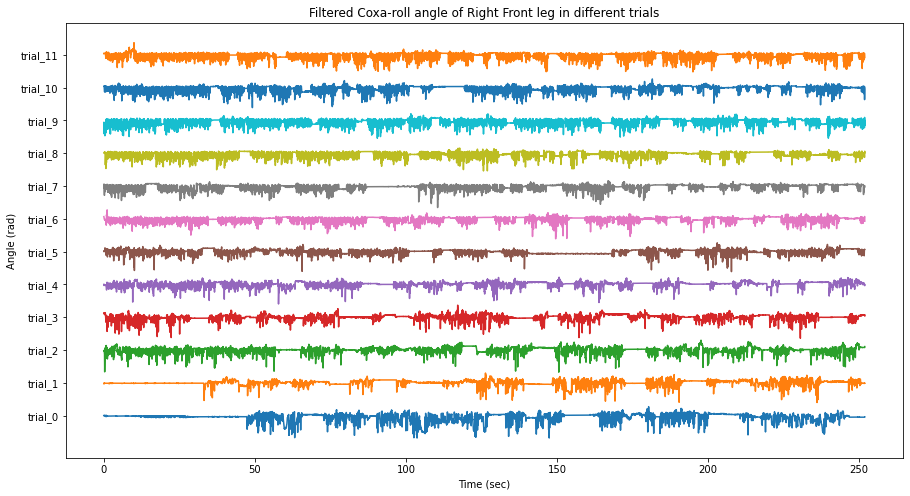

In [10]:
#plot  time traces of filtered angle_RF_leg_Coxa_roll across multiple trials to visually compare with plots of
#unfiltered data
filtered_beh_df = beh_df.copy(deep=True)
fs=100.0
order=2
cutoff=20 #chosen based on previous results


#plot unifltered of one specific angle
angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"]
filtered_beh_df_anglerf = butter_lowpass_filter(beh_df["angle_RF_leg_Coxa_roll"], cutoff, fs, order)
filtered_beh_df.angle_RF_leg_Coxa_roll=filtered_beh_df_anglerf
filtered_angle_RF_leg_roll = filtered_beh_df["angle_RF_leg_Coxa_roll"]
time = filtered_beh_df["t"]

fig, ax = plt.subplots(figsize = (15,8))
ytick = []

for i in range(12):
    y = filtered_angle_RF_leg_roll[filtered_angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
    t=time[time.index.get_level_values("Trial")==i]
    plt.plot(t, y, alpha = 1) 
    ytick.append(filtered_angle_RF_leg_roll.iloc[0] + i*3)

ax.set_yticks(np.array(ytick))
trial_names = ['trial_' + str(i) for i in range(12)]
ax.set_yticklabels(trial_names)
ax.set_ylabel('Angle (rad)')
ax.set_xlabel('Time (sec)')
ax.set_title('Filtered Coxa-roll angle of Right Front leg in different trials')
plt.show()
fig.savefig('report_images/w8_Coxa-roll.png')

In [11]:
#best parameters selected for filter for the behavioral data
fs=100.0
order=2
cutoff=20
filtered_beh_df = beh_df.copy(deep=True)#necessary to deep copy dataaframe
angl=beh_df.filter(regex="angle")
filtered_angl = butter_lowpass_filter(angl, cutoff, fs, order)
filtered_beh_df.iloc[:,2:44]=filtered_angl

##best parameters selected for filter for the neural data
filtered_neural_df = neural_df.copy(deep=True) 
fs=16.0
order=2
cutoff=2.5
neurons=neural_df.filter(regex="neuron")
filtered_neurons = butter_lowpass_filter(neurons, cutoff, fs, order)
filtered_neural_df.iloc[:,1:124]=filtered_neurons

filtered_neural_df = neural_dF_F(filtered_neural_df)
filtered_neural_df

t  neuron_0  neuron_1  neuron_2  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0        1.846767  1.830262  2.302435  0.913503   
                          1        1.908333  1.896733  2.223851  0.915863   
                          2        1.969900  1.913865  2.196361  0.898505   
                          3        2.031467  1.874510  2.254948  0.856188   
                          4        2.093000  1.829596  2.342961  0.807146   
...                                     ...       ...       ...       ...   
                    11    4035   250.257500  2.437069  0.407765  3.851353   
                          4036   250.319067  2.403217  0.448867  3.802544   
                          4037   250.380600  2.407801  0.449155  3.788424   
                          4038   250.442167  2.478857  0.391827  3.878330   
                          4039   250.503733  2.599644  0.294782  4.069995   

                                 neuron_3  neuron_4  neuron_5  neuron_6  \
Date   Genotype Fly Trial Frame                                           
210301 J1xCI9   1   0     0      0.673424  0.507693  0.534641  0.236509   
                          1      0.671848  0.493673  0.499232  0.256947   
                          2      0.664598  0.482641  0.480229  0.269833   
                          3      0.656248  0.474498  0.475333  0.272971   
                          4      0.656803  0.469005  0.472947  0.271457   
...                                   ...       ...       ...       ...   
                    11    4035   6.076314  1.898427  1.288609  0.438098   
                          4036   6.119052  1.935560  1.366787  0.454012   
                          4037   6.119410  1.992323  1.448984  0.453758   
                          4038   6.055433  2.073192  1.518322  0.444656   
                          4039   5.925515  2.173827  1.578098  0.442154   

                                 neuron_7  neuron_8  ...  neuron_113  \
Date   Genotype Fly Trial Frame                      ...               
210301 J1xCI9   1   0     0      0.684245  0.588805  ...    1.076976   
                          1      0.655468  0.566063  ...    1.040678   
                          2      0.650144  0.549203  ...    1.008861   
                          3      0.660358  0.539477  ...    0.987256   
                          4      0.660709  0.538147  ...    0.976346   
...                                   ...       ...  ...         ...   
                    11    4035   4.608283  1.554365  ...    0.405355   
                          4036   4.642148  1.556720  ...    0.427632   
                          4037   4.652684  1.536832  ...    0.481182   
                          4038   4.582710  1.495086  ...    0.529576   
                          4039   4.433745  1.438210  ...    0.564194   

                                 neuron_114  neuron_115  neuron_116  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        0.768052    0.855806    1.114782   
                          1        0.731206    0.864005    1.142800   
                          2        0.700835    0.869347    1.150103   
                          3        0.681750    0.872432    1.129095   
                          4        0.673142    0.871986    1.090137   
...                                     ...         ...         ...   
                    11    4035     1.884477    0.786541    2.500893   
                          4036     1.969924    0.785018    2.515189   
                          4037     2.043410    0.785238    2.498330   
                          4038     2.112438    0.747801    2.455444   
                          4039     2.183506    0.665350    2.378206   

                                 neuron_117  neuron_118  neuron_119  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        2.053602    1.458494    2.

## Combining neural & behavioural data

## Part 2: Classifying behaviour from neuronal activity
## Part 2.1

In [12]:
def reduce_mean(values):
    return np.mean(values, axis=0)
def reduce_std(values):
    return np.std(values, axis=0)
def reduce_behaviour(values):
    """
    this is just a sketch for how to reduce behavioural classes. 
    It picks whatever behaviour occurs the most.
    The function handles the case when two behaviours are equally likely thanks to the chosen treshold,
    and assures, given that the values are always 6 or 7, that if 4/6 or 4/7 behaviour frames are not labelled the same way
    returns nan and the data is excluded.
    """
    unique_values, N_per_unique = np.unique(values, return_counts=True)
    i_max = np.argmax(N_per_unique)

    #threshold = 0.75
    threshold = 4 #this treshold shows more robustness then using the 3/4
    for idx, unique_value in enumerate(unique_values):
        if N_per_unique[idx] > threshold:
        #if N_per_unique[idx] > threshold * len(values):
            return unique_value
    return "nan"
# threshold = 0.75
# for idx, unique_value in enumerate(unique_values):
#     if N_per_unique[idx] > threshold * len(values):
#          return unique_value
#return None

def reduce_during_2p_frame(twop_index, values, function=reduce_mean):
    """
    Reduces all values occuring during the acquisition of a
    two-photon imaging frame to a single value using the `function` given by the user.
    Parameters
    ----------
    twop_index : numpy array
        1d array holding frame indices of one trial.
    values : numpy array
        Values upsampled to the frequency of ThorSync,
        i.e. 1D numpy array of the same length as
        `frame_counter` or 2D numpy array of the same length.
    function : function
        Function used to reduce the value,
        e.g. np.mean for 1D variables
    Returns
    -------
    reduced : numpy array
        Numpy array with value for each two-photon imaging frame.
    """
    
    if len(twop_index) != len(values):
        raise ValueError("twop_index and values need to have the same length.")
    if len(values.shape) == 1:
        values = np.expand_dims(values, axis=1) #basically puth them in a column
        squeeze = True
    else:
        squeeze = False
    N_samples, N_variables = values.shape
    
    index_unique = np.unique(twop_index)
    index_unique = np.delete(index_unique, index_unique==-9223372036854775808) #copy of it with the specified objects removed
    
    dtype = values.dtype
    if np.issubdtype(dtype, np.number):
        dtype = np.float
    else:
        dtype = np.object
    reduced = np.empty((len(index_unique), N_variables), dtype=dtype)

    for i, index in enumerate(index_unique):
        reduced[i] = function(values[twop_index==index, :])
        
    return np.squeeze(reduced) if squeeze else reduced

In [14]:
#create list for storing the index corresponding to the frame with nans
indx=[]
reduced=[]

In [15]:
#try out functions with beh categories
for j in range(0,12):
    twop_index = filtered_beh_df.loc[(210301, "J1xCI9",1,j), "twop_index"].to_numpy()
    values = filtered_beh_df.loc[(210301, "J1xCI9",1,j), "Manual"].to_numpy()
    reduced.append(reduce_during_2p_frame(twop_index, values, function=reduce_behaviour))
    indx.append(np.where(reduced[j] =='nan'))
    reduced[j] = reduced[j][reduced[j] != 'nan']

In [16]:
#reorganize dataframe in order to remove the rows where the downsampling function gives nan as output with the 
#corresponding neuronal acitvity values across all the neurons
filtered_neurons_df=filtered_neural_df.copy(deep=True) #just be sure in case to rerun previous cells in the notebooks
#that original dataframe is not affected
filtered_neurons_df

t  neuron_0  neuron_1  neuron_2  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0        1.846767  1.830262  2.302435  0.913503   
                          1        1.908333  1.896733  2.223851  0.915863   
                          2        1.969900  1.913865  2.196361  0.898505   
                          3        2.031467  1.874510  2.254948  0.856188   
                          4        2.093000  1.829596  2.342961  0.807146   
...                                     ...       ...       ...       ...   
                    11    4035   250.257500  2.437069  0.407765  3.851353   
                          4036   250.319067  2.403217  0.448867  3.802544   
                          4037   250.380600  2.407801  0.449155  3.788424   
                          4038   250.442167  2.478857  0.391827  3.878330   
                          4039   250.503733  2.599644  0.294782  4.069995   

                                 neuron_3  neuron_4  neuron_5  neuron_6  \
Date   Genotype Fly Trial Frame                                           
210301 J1xCI9   1   0     0      0.673424  0.507693  0.534641  0.236509   
                          1      0.671848  0.493673  0.499232  0.256947   
                          2      0.664598  0.482641  0.480229  0.269833   
                          3      0.656248  0.474498  0.475333  0.272971   
                          4      0.656803  0.469005  0.472947  0.271457   
...                                   ...       ...       ...       ...   
                    11    4035   6.076314  1.898427  1.288609  0.438098   
                          4036   6.119052  1.935560  1.366787  0.454012   
                          4037   6.119410  1.992323  1.448984  0.453758   
                          4038   6.055433  2.073192  1.518322  0.444656   
                          4039   5.925515  2.173827  1.578098  0.442154   

                                 neuron_7  neuron_8  ...  neuron_113  \
Date   Genotype Fly Trial Frame                      ...               
210301 J1xCI9   1   0     0      0.684245  0.588805  ...    1.076976   
                          1      0.655468  0.566063  ...    1.040678   
                          2      0.650144  0.549203  ...    1.008861   
                          3      0.660358  0.539477  ...    0.987256   
                          4      0.660709  0.538147  ...    0.976346   
...                                   ...       ...  ...         ...   
                    11    4035   4.608283  1.554365  ...    0.405355   
                          4036   4.642148  1.556720  ...    0.427632   
                          4037   4.652684  1.536832  ...    0.481182   
                          4038   4.582710  1.495086  ...    0.529576   
                          4039   4.433745  1.438210  ...    0.564194   

                                 neuron_114  neuron_115  neuron_116  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        0.768052    0.855806    1.114782   
                          1        0.731206    0.864005    1.142800   
                          2        0.700835    0.869347    1.150103   
                          3        0.681750    0.872432    1.129095   
                          4        0.673142    0.871986    1.090137   
...                                     ...         ...         ...   
                    11    4035     1.884477    0.786541    2.500893   
                          4036     1.969924    0.785018    2.515189   
                          4037     2.043410    0.785238    2.498330   
                          4038     2.112438    0.747801    2.455444   
                          4039     2.183506    0.665350    2.378206   

                                 neuron_117  neuron_118  neuron_119  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        2.053602    1.458494    2.

In [18]:
#remove rows with nan
for i in range(0,12):
    selection = filtered_neurons_df.loc[(210301, "J1xCI9", 1, i)]
    selection = filtered_neurons_df.iloc[indx[i]]
    filtered_neurons_df.drop(selection.index, inplace=True)

In [19]:
filtered_neurons_df #new dataframe

t  neuron_0  neuron_1  neuron_2  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0        1.846767  1.830262  2.302435  0.913503   
                          1        1.908333  1.896733  2.223851  0.915863   
                          2        1.969900  1.913865  2.196361  0.898505   
                          3        2.031467  1.874510  2.254948  0.856188   
                          4        2.093000  1.829596  2.342961  0.807146   
...                                     ...       ...       ...       ...   
                    11    4035   250.257500  2.437069  0.407765  3.851353   
                          4036   250.319067  2.403217  0.448867  3.802544   
                          4037   250.380600  2.407801  0.449155  3.788424   
                          4038   250.442167  2.478857  0.391827  3.878330   
                          4039   250.503733  2.599644  0.294782  4.069995   

                                 neuron_3  neuron_4  neuron_5  neuron_6  \
Date   Genotype Fly Trial Frame                                           
210301 J1xCI9   1   0     0      0.673424  0.507693  0.534641  0.236509   
                          1      0.671848  0.493673  0.499232  0.256947   
                          2      0.664598  0.482641  0.480229  0.269833   
                          3      0.656248  0.474498  0.475333  0.272971   
                          4      0.656803  0.469005  0.472947  0.271457   
...                                   ...       ...       ...       ...   
                    11    4035   6.076314  1.898427  1.288609  0.438098   
                          4036   6.119052  1.935560  1.366787  0.454012   
                          4037   6.119410  1.992323  1.448984  0.453758   
                          4038   6.055433  2.073192  1.518322  0.444656   
                          4039   5.925515  2.173827  1.578098  0.442154   

                                 neuron_7  neuron_8  ...  neuron_113  \
Date   Genotype Fly Trial Frame                      ...               
210301 J1xCI9   1   0     0      0.684245  0.588805  ...    1.076976   
                          1      0.655468  0.566063  ...    1.040678   
                          2      0.650144  0.549203  ...    1.008861   
                          3      0.660358  0.539477  ...    0.987256   
                          4      0.660709  0.538147  ...    0.976346   
...                                   ...       ...  ...         ...   
                    11    4035   4.608283  1.554365  ...    0.405355   
                          4036   4.642148  1.556720  ...    0.427632   
                          4037   4.652684  1.536832  ...    0.481182   
                          4038   4.582710  1.495086  ...    0.529576   
                          4039   4.433745  1.438210  ...    0.564194   

                                 neuron_114  neuron_115  neuron_116  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        0.768052    0.855806    1.114782   
                          1        0.731206    0.864005    1.142800   
                          2        0.700835    0.869347    1.150103   
                          3        0.681750    0.872432    1.129095   
                          4        0.673142    0.871986    1.090137   
...                                     ...         ...         ...   
                    11    4035     1.884477    0.786541    2.500893   
                          4036     1.969924    0.785018    2.515189   
                          4037     2.043410    0.785238    2.498330   
                          4038     2.112438    0.747801    2.455444   
                          4039     2.183506    0.665350    2.378206   

                                 neuron_117  neuron_118  neuron_119  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        2.053602    1.458494    2.

In [20]:
filtered_neural_df #original dataframe unchanged

t  neuron_0  neuron_1  neuron_2  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0        1.846767  1.830262  2.302435  0.913503   
                          1        1.908333  1.896733  2.223851  0.915863   
                          2        1.969900  1.913865  2.196361  0.898505   
                          3        2.031467  1.874510  2.254948  0.856188   
                          4        2.093000  1.829596  2.342961  0.807146   
...                                     ...       ...       ...       ...   
                    11    4035   250.257500  2.437069  0.407765  3.851353   
                          4036   250.319067  2.403217  0.448867  3.802544   
                          4037   250.380600  2.407801  0.449155  3.788424   
                          4038   250.442167  2.478857  0.391827  3.878330   
                          4039   250.503733  2.599644  0.294782  4.069995   

                                 neuron_3  neuron_4  neuron_5  neuron_6  \
Date   Genotype Fly Trial Frame                                           
210301 J1xCI9   1   0     0      0.673424  0.507693  0.534641  0.236509   
                          1      0.671848  0.493673  0.499232  0.256947   
                          2      0.664598  0.482641  0.480229  0.269833   
                          3      0.656248  0.474498  0.475333  0.272971   
                          4      0.656803  0.469005  0.472947  0.271457   
...                                   ...       ...       ...       ...   
                    11    4035   6.076314  1.898427  1.288609  0.438098   
                          4036   6.119052  1.935560  1.366787  0.454012   
                          4037   6.119410  1.992323  1.448984  0.453758   
                          4038   6.055433  2.073192  1.518322  0.444656   
                          4039   5.925515  2.173827  1.578098  0.442154   

                                 neuron_7  neuron_8  ...  neuron_113  \
Date   Genotype Fly Trial Frame                      ...               
210301 J1xCI9   1   0     0      0.684245  0.588805  ...    1.076976   
                          1      0.655468  0.566063  ...    1.040678   
                          2      0.650144  0.549203  ...    1.008861   
                          3      0.660358  0.539477  ...    0.987256   
                          4      0.660709  0.538147  ...    0.976346   
...                                   ...       ...  ...         ...   
                    11    4035   4.608283  1.554365  ...    0.405355   
                          4036   4.642148  1.556720  ...    0.427632   
                          4037   4.652684  1.536832  ...    0.481182   
                          4038   4.582710  1.495086  ...    0.529576   
                          4039   4.433745  1.438210  ...    0.564194   

                                 neuron_114  neuron_115  neuron_116  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        0.768052    0.855806    1.114782   
                          1        0.731206    0.864005    1.142800   
                          2        0.700835    0.869347    1.150103   
                          3        0.681750    0.872432    1.129095   
                          4        0.673142    0.871986    1.090137   
...                                     ...         ...         ...   
                    11    4035     1.884477    0.786541    2.500893   
                          4036     1.969924    0.785018    2.515189   
                          4037     2.043410    0.785238    2.498330   
                          4038     2.112438    0.747801    2.455444   
                          4039     2.183506    0.665350    2.378206   

                                 neuron_117  neuron_118  neuron_119  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        2.053602    1.458494    2.

In [ ]:
print(len(reduced[0][:])) #check dimensions

In [21]:
#concatenate all of the behavioral labels of the singles trials in one variable
reducedv=np.concatenate((reduced[0][:],reduced[1][:],reduced[2][:],reduced[3][:],reduced[4][:],reduced[5][:],reduced[6][:],reduced[7][:],reduced[8][:],reduced[9][:],reduced[10][:],reduced[11][:]),axis=None)
len(reducedv)

47478

In [22]:
# prepare binary variable for walking to indicate whether fly is walking or not
bin_var_walk=np.where(reducedv=='walking',1,0)
bin_var_walk= bin_var_walk.tolist()
print(len(bin_var_walk)) #check if length matches

47478


In [24]:
def logreg_1binvar(X,y):   
    """
    Uses logistic regression with one or multiple neuron's activities as input and binary variable that indicates
    whether the fly is exhibiting a certain behavior or not as output of the model.
    First the datset is stratified split into train and test then some preprocessing is done. The classifier
    is built, trained and then the predictions are made on the test data with a brief visualization of the
    prediction given.
    A classification report is then given which gives a measure of the quality of the prediction from the 
    classificatio algorithm. A confusion matrix is plotted in order to give a visualization of the results.
    Parameters
    ----------
    X : numpy matrix
        Matrix holding the regressors.
    y : numpy list
        List holding all the behavioral labels
    Returns
    -------
    model : sklearn object
        Logistic regression model.
    """
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    #preprocessing
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
    print(Counter(y_train)) #sanity check of the labels
    print(Counter(y_test))
    
    #build the classifier and train it
    model = LogisticRegression(random_state=10) #fixed random state
    model.fit(X_train, y_train)
    
    #make prediction and print classification report
    y_pred = pd.Series(model.predict(X_test))
    y_test = pd.Series(y_test)
    z = pd.concat([y_test, y_pred], axis=1)
    z.columns = ['True', 'Prediction']
    print(z.head())
    print('\n')
    print(metrics.classification_report(y_test, y_pred))
    
    #get confusion matrix and print it
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    return model

In [25]:
#create a dataframe in order to sort the neurons by their correlation coefficient with the walking binary variable
#obtained from previous computations in other parts, more neurons will be subsequently added as regressors
#the neurons are sorted by decreasing order
sorted_neurons=['neuron_21', 'neuron_58', 'neuron_82', 'neuron_92', 'neuron_14', 'neuron_38', 'neuron_51', 'neuron_12', 'neuron_10', 'neuron_48', 'neuron_118', 'neuron_105', 'neuron_11', 'neuron_116', 'neuron_91', 'neuron_34', 'neuron_85', 'neuron_114', 'neuron_115', 'neuron_22', 'neuron_23', 'neuron_5', 'neuron_32', 'neuron_20', 'neuron_121', 'neuron_26', 'neuron_120', 'neuron_79', 'neuron_99', 'neuron_101', 'neuron_96', 'neuron_8', 'neuron_97', 'neuron_73', 'neuron_33', 'neuron_47', 'neuron_25', 'neuron_9', 'neuron_36', 'neuron_57', 'neuron_29', 'neuron_100', 'neuron_93', 'neuron_28', 'neuron_117', 'neuron_35', 'neuron_60', 'neuron_56', 'neuron_90', 'neuron_68', 'neuron_49', 'neuron_75', 'neuron_4', 'neuron_62', 'neuron_46', 'neuron_102', 'neuron_16', 'neuron_88', 'neuron_65', 'neuron_54', 'neuron_106', 'neuron_78', 'neuron_17', 'neuron_103', 'neuron_89', 'neuron_63', 'neuron_41', 'neuron_24', 'neuron_77', 'neuron_107', 'neuron_15', 'neuron_83', 'neuron_84', 'neuron_71', 'neuron_31', 'neuron_1', 'neuron_42', 'neuron_39', 'neuron_94', 'neuron_0', 'neuron_74', 'neuron_76', 'neuron_70', 'neuron_37', 'neuron_6', 'neuron_66', 'neuron_30', 'neuron_72', 'neuron_13', 'neuron_18', 'neuron_108', 'neuron_44', 'neuron_3', 'neuron_50', 'neuron_104', 'neuron_69', 'neuron_86', 'neuron_111', 'neuron_43', 'neuron_113']
sort100_filtered_neural_df=filtered_neurons_df.reindex(columns=sorted_neurons)
sort100_filtered_neural_df

neuron_21  neuron_58  neuron_82  neuron_92  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.318577   0.577028   0.701083   0.364171   
                          1       0.335087   0.569102   0.647614   0.370210   
                          2       0.351363   0.571483   0.620407   0.368803   
                          3       0.363854   0.582141   0.616211   0.363200   
                          4       0.365302   0.586783   0.617443   0.361787   
...                                    ...        ...        ...        ...   
                    11    4035    0.928840   0.529797   0.833848   0.810034   
                          4036    0.896058   0.561794   0.892568   0.818491   
                          4037    0.861573   0.569366   0.933463   0.814140   
                          4038    0.839689   0.562377   0.925626   0.808921   
                          4039    0.824642   0.565353   0.876184   0.808979   

                                 neuron_14  neuron_38  neuron_51  neuron_12  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.573358   0.483583   0.190515   0.494567   
                          1       0.599533   0.486479   0.231991   0.469153   
                          2       0.611120   0.479230   0.252516   0.450740   
                          3       0.604687   0.465959   0.251577   0.446185   
                          4       0.588363   0.456616   0.242836   0.450911   
...                                    ...        ...        ...        ...   
                    11    4035    1.779669   1.628995   0.910157   2.107102   
                          4036    1.755210   1.628647   0.915487   2.097252   
                          4037    1.724616   1.647448   0.950121   2.050421   
                          4038    1.720158   1.683744   0.995809   2.051767   
                          4039    1.746897   1.722045   1.031271   2.128350   

                                 neuron_10  neuron_48  ...  neuron_108  \
Date   Genotype Fly Trial Frame                        ...               
210301 J1xCI9   1   0     0       0.218194   0.468060  ...    0.583090   
                          1       0.256498   0.461287  ...    0.563702   
                          2       0.268329   0.452161  ...    0.544293   
                          3       0.260594   0.443611  ...    0.530457   
                          4       0.249975   0.437240  ...    0.525617   
...                                    ...        ...  ...         ...   
                    11    4035    0.687161   1.572850  ...    1.505551   
                          4036    0.691659   1.691234  ...    1.514016   
                          4037    0.695724   1.738233  ...    1.521249   
                          4038    0.691142   1.649397  ...    1.496838   
                          4039    0.675036   1.451662  ...    1.437153   

                                 neuron_44  neuron_3  neuron_50  neuron_104  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       1.558347  0.673424   1.147128    1.343664   
                          1       1.701776  0.671848   1.169191    1.312721   
                          2       1.784226  0.664598   1.180524    1.289817   
                          3       1.791340  0.656248   1.182573    1.282971   
                          4       1.760888  0.656803   1.181845    1.298253   
...                                    ...       ...        ...         ...   
                    11    4035    1.946301  6.076314   0.716369    1.125851   
                          4036    2.055568  6.119052   0.716945    1.146462   
                          4037    2.137911  6.119410   0.712650    1.152585   
                          4038    2.194238  6.055433   0.695235    1.163758   
                          4039    2.244026  5.925515   0.663074   

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     0           0
1     1           1
2     1           1
3     1           0
4     1           1


              precision    recall  f1-score   support

           0       0.57      0.61      0.59      4668
           1       0.60      0.56      0.58      4828

    accuracy                           0.58      9496
   macro avg       0.58      0.58      0.58      9496
weighted avg       0.58      0.58      0.58      9496



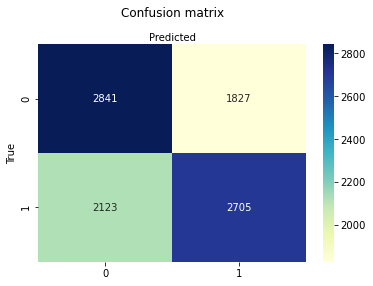

In [26]:
#choose the highest correlated neuron as regressors for the predction of the binary walking behavior
neuron_21 = sort100_filtered_neural_df.loc[(210301, "J1xCI9", 1), "neuron_21"]
X=np.expand_dims(neuron_21, axis=1)

#make prediction with classifier
log_reg_walk= logreg_1binvar(X,bin_var_walk)

As we can see the prediction is quite poor.

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     0           0
1     1           1
2     0           1
3     0           0
4     0           0


              precision    recall  f1-score   support

           0       0.59      0.56      0.58      4668
           1       0.60      0.63      0.61      4828

    accuracy                           0.60      9496
   macro avg       0.60      0.60      0.60      9496
weighted avg       0.60      0.60      0.60      9496



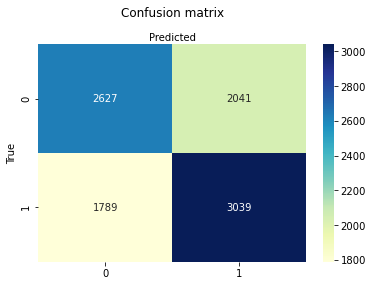

In [28]:
#start increasing the number of regressors and see how the classifier prediction evolves
#try with the frist two neurons

chosen_neurons=sort100_filtered_neural_df.loc[:,'neuron_21':'neuron_58']
chosen_neurons=chosen_neurons.loc[(210301, "J1xCI9", 1)]
#train classifier
log_reg_walk2= logreg_1binvar(chosen_neurons,bin_var_walk)


Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     0           1
1     0           0
2     1           1
3     1           1
4     1           0


              precision    recall  f1-score   support

           0       0.59      0.57      0.58      4668
           1       0.60      0.62      0.61      4828

    accuracy                           0.60      9496
   macro avg       0.60      0.60      0.60      9496
weighted avg       0.60      0.60      0.60      9496



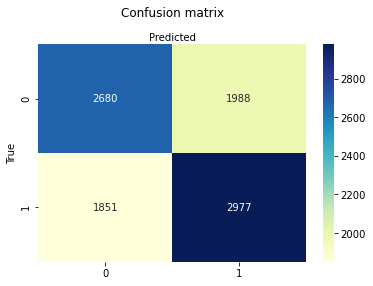

In [35]:
#6 regressors
chosen_neurons=sort100_filtered_neural_df.iloc[:,0:6]
chosen_neurons=chosen_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk6= logreg_1binvar(chosen_neurons,bin_var_walk)

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     0           0
1     0           1
2     1           0
3     1           0
4     1           1


              precision    recall  f1-score   support

           0       0.61      0.65      0.63      4668
           1       0.64      0.59      0.61      4828

    accuracy                           0.62      9496
   macro avg       0.62      0.62      0.62      9496
weighted avg       0.62      0.62      0.62      9496



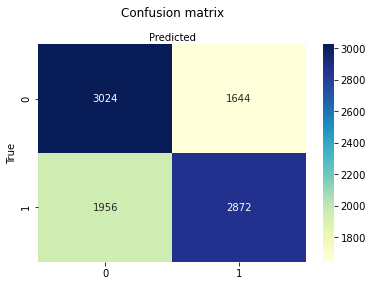

In [36]:
#12 regressors
chosen_neurons=sort100_filtered_neural_df.iloc[:,0:12]
chosen_neurons=chosen_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk12= logreg_1binvar(chosen_neurons,bin_var_walk)

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     0           0
1     0           1
2     1           1
3     1           1
4     1           1


              precision    recall  f1-score   support

           0       0.63      0.65      0.64      4668
           1       0.65      0.63      0.64      4828

    accuracy                           0.64      9496
   macro avg       0.64      0.64      0.64      9496
weighted avg       0.64      0.64      0.64      9496



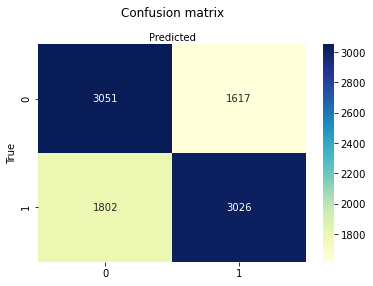

In [38]:
#25 regressors
chosen_neurons=sort100_filtered_neural_df.iloc[:,0:25]
chosen_neurons=chosen_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk25= logreg_1binvar(chosen_neurons,bin_var_walk)

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     0           1
1     1           0
2     1           1
3     0           0
4     1           0


              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4668
           1       0.67      0.67      0.67      4828

    accuracy                           0.66      9496
   macro avg       0.66      0.66      0.66      9496
weighted avg       0.66      0.66      0.66      9496



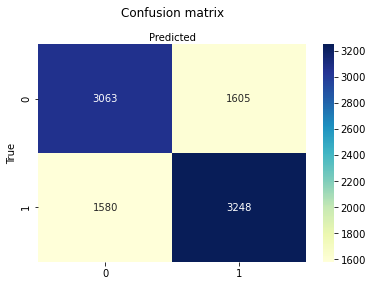

In [39]:
#50 regressors
chosen_neurons=sort100_filtered_neural_df.iloc[:,0:50]
chosen_neurons=chosen_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk50= logreg_1binvar(chosen_neurons,bin_var_walk)

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   True  Prediction
0     1           1
1     0           0
2     0           0
3     0           0
4     1           1


              precision    recall  f1-score   support

           0       0.69      0.67      0.68      4668
           1       0.69      0.70      0.70      4828

    accuracy                           0.69      9496
   macro avg       0.69      0.69      0.69      9496
weighted avg       0.69      0.69      0.69      9496



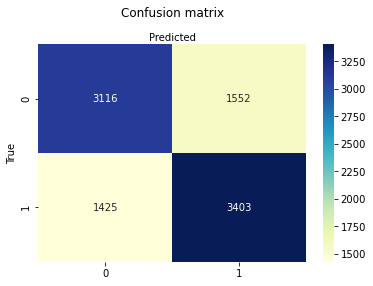

In [41]:
#100 regressors
chosen_neurons=sort100_filtered_neural_df.iloc[:,0:100]
chosen_neurons=chosen_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk100= logreg_1binvar(chosen_neurons,bin_var_walk)

Very similar performance results from 25 to 100 regressors.

Counter({1: 19312, 0: 18670})
Counter({1: 4828, 0: 4668})
   True  Prediction
0     1           1
1     0           0
2     0           0
3     0           0
4     1           1


              precision    recall  f1-score   support

           0       0.69      0.68      0.68      4668
           1       0.69      0.70      0.70      4828

    accuracy                           0.69      9496
   macro avg       0.69      0.69      0.69      9496
weighted avg       0.69      0.69      0.69      9496



Text(0.5, 15.0, 'Predicted')

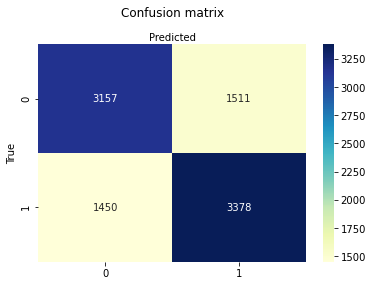

In [46]:
#all the neurons
neurons=filtered_neurons_df.iloc[:,0:124]
neurons=neurons.loc[(210301, "J1xCI9", 1)]
X_train, X_test, y_train, y_test = train_test_split(neurons, bin_var_walk, test_size=0.2, stratify=bin_var_walk)
    
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
print(Counter(y_train))
print(Counter(y_test))
    
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #increased max iteration in order to reach convergence, 
#however even without that results are basically the same which speaks for the classifier being quite stable despite 
#not converging
model.fit(X_train, y_train)
    
    #make prediction and print classification report
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print('\n')
print(metrics.classification_report(y_test, y_pred))
    #get confusion matrix and print it
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## Part 2.1.3


In [47]:
coeff = model.coef_
print(coeff)
print(np.count_nonzero((abs(coeff))>=0.2))

[[-0.06991294  0.07751705 -0.07772474  0.13190517 -0.22118811  0.1080605
  -0.5086149   0.27596728 -0.11994079 -0.18962829  0.07232105 -0.03217095
   0.11567415  0.5316578   0.04884174  0.24103836  0.21737477 -0.016577
  -0.08648059 -0.0478004  -0.08327762 -0.32017291  0.1763549   0.03956005
  -0.31451131  0.23763236 -0.09314419  0.08204614  0.17443814 -0.26071596
  -0.18299368 -0.21264838  0.07182614  0.10843679  0.30192339  0.34142992
  -0.11807294 -0.11851247 -0.05983316  0.33370603 -0.10793282  0.04604128
   0.25407923 -0.05883708  0.10342544  0.79399481  0.24903664 -0.30990736
  -0.29572295 -0.41600062 -0.04989097  0.01957817  0.01053646  0.21666878
  -0.42227633  0.11849371  0.06854152 -0.20180279 -0.23505201 -0.09263839
   0.00397949 -0.16279036 -0.10258742 -0.39487724 -0.08618774 -0.13546101
   0.36392887  0.13539405  0.22509493  0.09715411  0.09245771 -0.16557207
   0.0270915   0.0352947   0.03767163  0.0084546   0.17250954 -0.32632607
  -0.00470997 -0.13111264 -0.01817595  0.

If we consider as meaningful just the weights whose absolute value is >=0.2 then just 38 out of 123 Neurons are taken into consideration by the classifier. 

## Part 2.1.4
Try the same thing with other behaviours (e.g., anterior grooming). Can you classify
those with the same accuracy?

In [48]:
# reduce binary variable for every behavior
#resting
bin_var_rest=np.where(reducedv=='resting',1,0)
bin_var_rest= bin_var_rest.tolist()
#ab_push
bin_var_ap=np.where(reducedv=='abdominal_pushing',1,0)
bin_var_ap= bin_var_ap.tolist()
#ant_groom
bin_var_ag=np.where(reducedv=='anterior_grooming',1,0)
bin_var_ag= bin_var_ag.tolist()
#post_groom not sure if to include as it is super rare beahvior
bin_var_pg=np.where(reducedv=='posterior_grooming',1,0)
bin_var_pg= bin_var_pg.tolist()

Resting
Counter({0: 24299, 1: 13683})
Counter({0: 6075, 1: 3421})
   True  Prediction
0     0           0
1     0           0
2     0           0
3     1           0
4     0           0


              precision    recall  f1-score   support

           0       0.71      0.89      0.79      6075
           1       0.64      0.35      0.45      3421

    accuracy                           0.69      9496
   macro avg       0.67      0.62      0.62      9496
weighted avg       0.68      0.69      0.67      9496



Text(0.5, 15.0, 'Predicted')

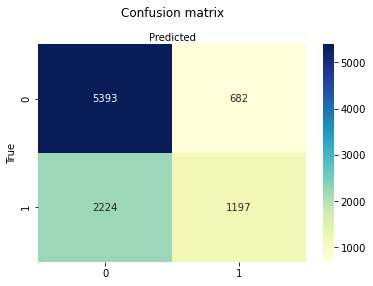

In [51]:
# train and test with binary resting varaibles and other behaviors
print("Resting")
neurons=filtered_neurons_df.iloc[:,0:124]
neurons=neurons.loc[(210301, "J1xCI9", 1)]
X_train, X_test, y_train, y_test = train_test_split(neurons, bin_var_rest, test_size=0.2, stratify=bin_var_rest)
    
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
print(Counter(y_train))
print(Counter(y_test))
    
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #increased max iteration in order to reach convergence, 
#however even without that results are basically the same which speaks for the classifier being quite stable despite 
#not converging
model.fit(X_train, y_train)
    
    #make prediction and print classification report
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print('\n')
print(metrics.classification_report(y_test, y_pred))
    #get confusion matrix and print it
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Abdnominal pushing
Counter({0: 37021, 1: 961})
Counter({0: 9256, 1: 240})
   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9256
           1       0.94      0.71      0.81       240

    accuracy                           0.99      9496
   macro avg       0.97      0.85      0.90      9496
weighted avg       0.99      0.99      0.99      9496



Text(0.5, 15.0, 'Predicted')

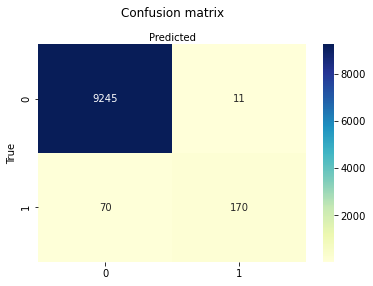

In [52]:
print("Abdnominal pushing")
neurons=filtered_neurons_df.iloc[:,0:124]
neurons=neurons.loc[(210301, "J1xCI9", 1)]
X_train, X_test, y_train, y_test = train_test_split(neurons, bin_var_ap, test_size=0.2, stratify=bin_var_ap)
    
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
print(Counter(y_train))
print(Counter(y_test))
    
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #increased max iteration in order to reach convergence, 
#however even without that results are basically the same which speaks for the classifier being quite stable despite 
#not converging
model.fit(X_train, y_train)
    
    #make prediction and print classification report
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print('\n')
print(metrics.classification_report(y_test, y_pred))
    #get confusion matrix and print it
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Anterior Grooming
Counter({0: 34217, 1: 3765})
Counter({0: 8555, 1: 941})
   True  Prediction
0     0           0
1     1           0
2     0           0
3     0           0
4     0           0


              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8555
           1       0.55      0.06      0.10       941

    accuracy                           0.90      9496
   macro avg       0.73      0.53      0.53      9496
weighted avg       0.87      0.90      0.86      9496



Text(0.5, 15.0, 'Predicted')

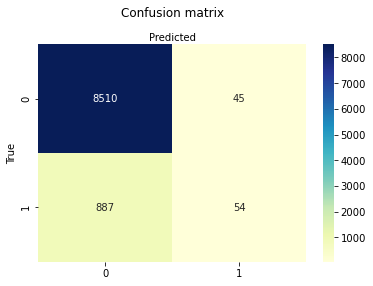

In [54]:
print("Anterior Grooming")
neurons=filtered_neurons_df.iloc[:,0:124]
neurons=neurons.loc[(210301, "J1xCI9", 1)]
X_train, X_test, y_train, y_test = train_test_split(neurons, bin_var_ag, test_size=0.2, stratify=bin_var_ag)
    
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
print(Counter(y_train))
print(Counter(y_test))
    
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #increased max iteration in order to reach convergence, 
#however even without that results are basically the same which speaks for the classifier being quite stable despite 
#not converging
model.fit(X_train, y_train)
    
    #make prediction and print classification report
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print('\n')
print(metrics.classification_report(y_test, y_pred))
    #get confusion matrix and print it
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Posterior Grooming 
As this behavior is very rare
Counter({0: 37720, 1: 262})
Counter({0: 9431, 1: 65})
   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9431
           1       0.92      0.17      0.29        65

    accuracy                           0.99      9496
   macro avg       0.96      0.58      0.64      9496
weighted avg       0.99      0.99      0.99      9496



Text(0.5, 15.0, 'Predicted')

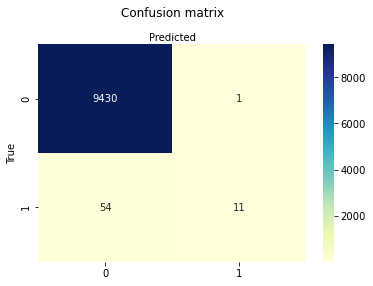

In [55]:
print("Posterior Grooming \nAs this behavior is very rare")
neurons=filtered_neurons_df.iloc[:,0:124]
neurons=neurons.loc[(210301, "J1xCI9", 1)]
X_train, X_test, y_train, y_test = train_test_split(neurons, bin_var_pg, test_size=0.2, stratify=bin_var_pg)
    
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
print(Counter(y_train))
print(Counter(y_test))
    
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #increased max iteration in order to reach convergence, 
#however even without that results are basically the same which speaks for the classifier being quite stable despite 
#not converging
model.fit(X_train, y_train)
    
    #make prediction and print classification report
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print('\n')
print(metrics.classification_report(y_test, y_pred))
    #get confusion matrix and print it
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

We can see here a comparison between the different behaviors for their prediction with always a binary variable as output.

## Part 2.2: Predicting multiple behaviours


1. Predict all behaviours at once with multi-class logistic regression. How much
performance can your model achieve compared to predicting individual behaviours?

In [56]:
# assign variables to every behavior
#Mult_beh_var=np.unique(reduced,return_inverse=True)[1].tolist()
my_dict = {'resting': 0, 'walking': 1, 'abdominal_pushing': 2, 'anterior_grooming': 3, 'posterior_grooming': 4}
Mult_beh_var=[my_dict[zi] for zi in reducedv]

Counter({1: 19312, 0: 13683, 3: 3765, 2: 961, 4: 261})
Counter({1: 4828, 0: 3421, 3: 941, 2: 240, 4: 66})
   True  Prediction
0     3           3
1     1           0
2     1           1
3     3           1
4     0           0
              precision    recall  f1-score   support

           0       0.58      0.51      0.54      3421
           1       0.66      0.79      0.72      4828
           2       0.83      0.81      0.82       240
           3       0.46      0.19      0.27       941
           4       0.77      0.35      0.48        66

    accuracy                           0.63      9496
   macro avg       0.66      0.53      0.57      9496
weighted avg       0.62      0.63      0.61      9496



Text(0.5, 15.0, 'Predicted')

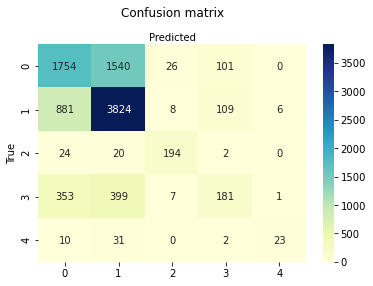

In [71]:
X_train, X_test, y_train, y_test = train_test_split(neurons, Mult_beh_var, test_size=0.2, stratify=Mult_beh_var)
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    #check if there may have been a problem with could be resolved with stratified split
print(Counter(y_train))
print(Counter(y_test))
    #build the classifier and train it
model = LogisticRegression(max_iter=1500,random_state=10) #multiclass left to auto settings
model.fit(X_train, y_train)
    #make prediction and give brief visualization of prediction
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [72]:
coeff = model.coef_
print(coeff)
for i in range(5):
    print(np.count_nonzero((abs(coeff[i,:]))>=0.2))

[[ 7.22028384e-01 -4.46729316e-01 -3.73080767e-02  1.19842201e+00
  -4.71656503e-02  1.28988168e-01  4.41002586e-01  6.16821084e-01
  -5.31568908e-01  1.66850721e-01  1.58404357e-01  3.50005124e-01
   4.03431200e-01  4.57499839e-01  1.96175597e-01 -5.09684751e-01
   7.23963740e-01 -2.93570003e-01  1.53234632e-01  3.24990835e-01
   2.51265873e-01 -5.07933791e-01  1.24349944e-03 -3.95319554e-01
   1.30047174e-01 -3.14603756e-01 -3.24846052e-01 -4.36569251e-01
  -2.83244161e-01  1.65503768e+00 -1.50468124e-01 -1.20164156e-02
   1.44027344e-01 -1.42288482e-01  8.21602755e-02 -7.00755417e-02
  -1.32828003e-01 -2.90788812e-01 -3.11282026e-01  2.75927311e-01
   4.25861112e-02  1.24165182e-01  3.60786887e-01  3.01190697e-01
  -3.61372386e-01  1.44711798e-03  7.54587525e-02  2.81674793e-01
  -2.60158067e-01  4.23097703e-01 -1.32453151e-01  2.71383082e-01
  -1.41428217e-02 -7.07118175e-01 -1.29245051e-01 -7.11026418e-02
   6.16484276e-02 -4.46791718e-01  2.35216828e-01  6.32146266e-02
   2.01267

Multiple neurons contribute to the prediction.

## Part 2.2.2

In [59]:
from sklearn.neural_network import MLPClassifier

Counter({1: 19312, 0: 13683, 3: 3765, 2: 961, 4: 261})
Counter({1: 4828, 0: 3421, 3: 941, 2: 240, 4: 66})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3421
           1       0.92      0.96      0.94      4828
           2       0.94      0.97      0.96       240
           3       0.86      0.85      0.86       941
           4       0.92      0.82      0.86        66

    accuracy                           0.93      9496
   macro avg       0.92      0.90      0.91      9496
weighted avg       0.93      0.93      0.93      9496



Text(0.5, 15.0, 'Predicted')

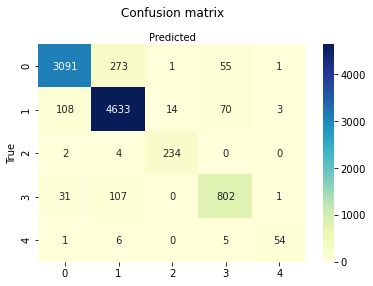

In [60]:
X_train, X_test, y_train, y_test = train_test_split(neurons, Mult_beh_var, test_size=0.2, stratify=Mult_beh_var)
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    #check if there may have been a problem with could be resolved with stratified split
print(Counter(y_train))
print(Counter(y_test))
    #build the classifier and train it
model =  MLPClassifier(random_state=39) #multiclass left to auto settings
model.fit(X_train, y_train)
    #make prediction and give brief visualization of prediction
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Text(0.5, 0, 'Number of steps')

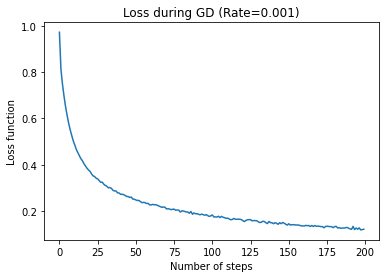

In [61]:
#check evolution of loss function
fig, ax = plt.subplots()
ax.plot(model.loss_curve_)
ax.set_title('Loss during GD (Rate=0.001)')
ax.set_ylabel('Loss function')
ax.set_xlabel('Number of steps')

Text(0.5, 0, 'Number of steps')

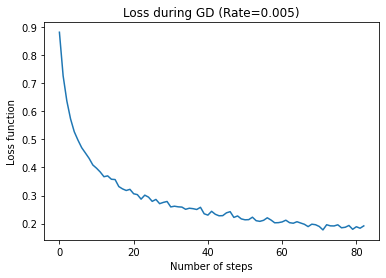

In [62]:
model.learning_rate_init=0.005
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.plot(model.loss_curve_)
ax.set_title('Loss during GD (Rate=0.005)')
ax.set_ylabel('Loss function')
ax.set_xlabel('Number of steps')

Increasing the learning rate does not improve the situation.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(slf_4, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [65]:
#MLP does not converge with default values and increasing learning rate does not get us better results.
#try to do a quick grid search
mlp=MLPClassifier(random_state=39)
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,)],
    'solver': ['sgd', 'adam'],
    'alpha': [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1],
    'learning_rate_init': [10**-4, 10**-3, 10**-2, 10**-1],
}

In [66]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, scoring='accuracy')
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=39), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [67]:
# Best parametee set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3421
           1       0.92      0.96      0.94      4828
           2       0.96      0.96      0.96       240
           3       0.85      0.85      0.85       941
           4       0.90      0.82      0.86        66

    accuracy                           0.93      9496
   macro avg       0.92      0.90      0.91      9496
weighted avg       0.93      0.93      0.93      9496



Text(0.5, 15.0, 'Predicted')

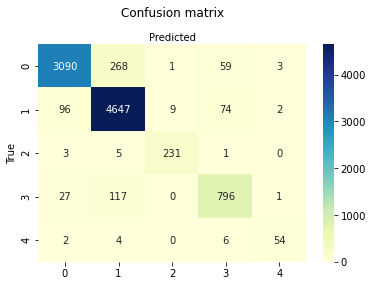

In [68]:
y_pred = pd.Series(clf.predict(X_test))
y_test = pd.Series(y_test)
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')